# Trigram LM model

Implement the trigram LM model using the probability and NN using torch

## Frequency matrix method

In [2]:
with open('../names.txt', 'r') as file:
    names = file.read().splitlines()

len(names)

32033

### Step 1: Create the trigrams

In [4]:
trigram_dict = {}

for name in names:
    name = ['.'] + list(name) + ['.']

    for ch1, ch2, ch3 in zip(name, name[1:], name[2:]):
        bigram = ch1 + ch2
        trigram = (bigram, ch3)
        trigram_dict[trigram] = trigram_dict.get(trigram, 0) + 1

print(f"No. of trigrams: {len(trigram_dict)}")

No. of trigrams: 6037


In [6]:
sorted(trigram_dict.keys())[1000:1200]

[('ca', 'r'),
 ('ca', 's'),
 ('ca', 't'),
 ('ca', 'u'),
 ('ca', 'v'),
 ('ca', 'y'),
 ('ca', 'z'),
 ('cc', '.'),
 ('cc', 'a'),
 ('cc', 'e'),
 ('cc', 'h'),
 ('cc', 'i'),
 ('cc', 'l'),
 ('cc', 'o'),
 ('cc', 'r'),
 ('cd', 'e'),
 ('ce', '.'),
 ('ce', 'a'),
 ('ce', 'b'),
 ('ce', 'c'),
 ('ce', 'd'),
 ('ce', 'e'),
 ('ce', 'i'),
 ('ce', 'k'),
 ('ce', 'l'),
 ('ce', 'm'),
 ('ce', 'n'),
 ('ce', 'o'),
 ('ce', 'p'),
 ('ce', 'r'),
 ('ce', 's'),
 ('ce', 't'),
 ('ce', 'u'),
 ('ce', 'v'),
 ('ce', 'y'),
 ('ce', 'z'),
 ('cg', 'r'),
 ('cg', 'u'),
 ('ch', '.'),
 ('ch', 'a'),
 ('ch', 'e'),
 ('ch', 'i'),
 ('ch', 'l'),
 ('ch', 'm'),
 ('ch', 'n'),
 ('ch', 'o'),
 ('ch', 'r'),
 ('ch', 's'),
 ('ch', 'u'),
 ('ch', 'y'),
 ('ci', '.'),
 ('ci', 'a'),
 ('ci', 'c'),
 ('ci', 'd'),
 ('ci', 'e'),
 ('ci', 'f'),
 ('ci', 'i'),
 ('ci', 'j'),
 ('ci', 'l'),
 ('ci', 'm'),
 ('ci', 'n'),
 ('ci', 'o'),
 ('ci', 'p'),
 ('ci', 'r'),
 ('ci', 's'),
 ('ci', 't'),
 ('ci', 'u'),
 ('ci', 'v'),
 ('cj', '.'),
 ('cj', 'a'),
 ('ck', '.'),
 ('ck'

### Step 2: Create the stoi, itos, btoi, itob 

b -> bigram

In [13]:
chars = sorted(list(set("".join(name for name in names))))
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [14]:
stoi, itos, btoi, itob = {}, {}, {}, {}

stoi['.'] = 0
itos[0] = '.'

for i, char in enumerate(chars):
    stoi[char] = i + 1
    itos[i + 1] = char

cnt = 0

for ch1 in (['.'] + chars):
    for ch2 in chars:
        bigram = ch1 + ch2
        btoi[bigram] = cnt
        itob[cnt] = bigram
        cnt += 1

In [27]:
sorted(btoi.keys())[200:250]

['gs',
 'gt',
 'gu',
 'gv',
 'gw',
 'gx',
 'gy',
 'gz',
 'ha',
 'hb',
 'hc',
 'hd',
 'he',
 'hf',
 'hg',
 'hh',
 'hi',
 'hj',
 'hk',
 'hl',
 'hm',
 'hn',
 'ho',
 'hp',
 'hq',
 'hr',
 'hs',
 'ht',
 'hu',
 'hv',
 'hw',
 'hx',
 'hy',
 'hz',
 'ia',
 'ib',
 'ic',
 'id',
 'ie',
 'if',
 'ig',
 'ih',
 'ii',
 'ij',
 'ik',
 'il',
 'im',
 'in',
 'io',
 'ip']

### Step 3: Create the frequency matrix

In [32]:
import torch

freqs = torch.zeros((len(btoi), len(stoi)), dtype=torch.int32)
freqs.shape

torch.Size([702, 27])

In [33]:
for trigram, freq in trigram_dict.items():
    bigram, ch = trigram[0], trigram[1]
    
    idx1 = btoi[bigram]
    idx2 = stoi[ch]

    freqs[idx1][idx2] = freq

# Smoothen the matrix
freqs += 1

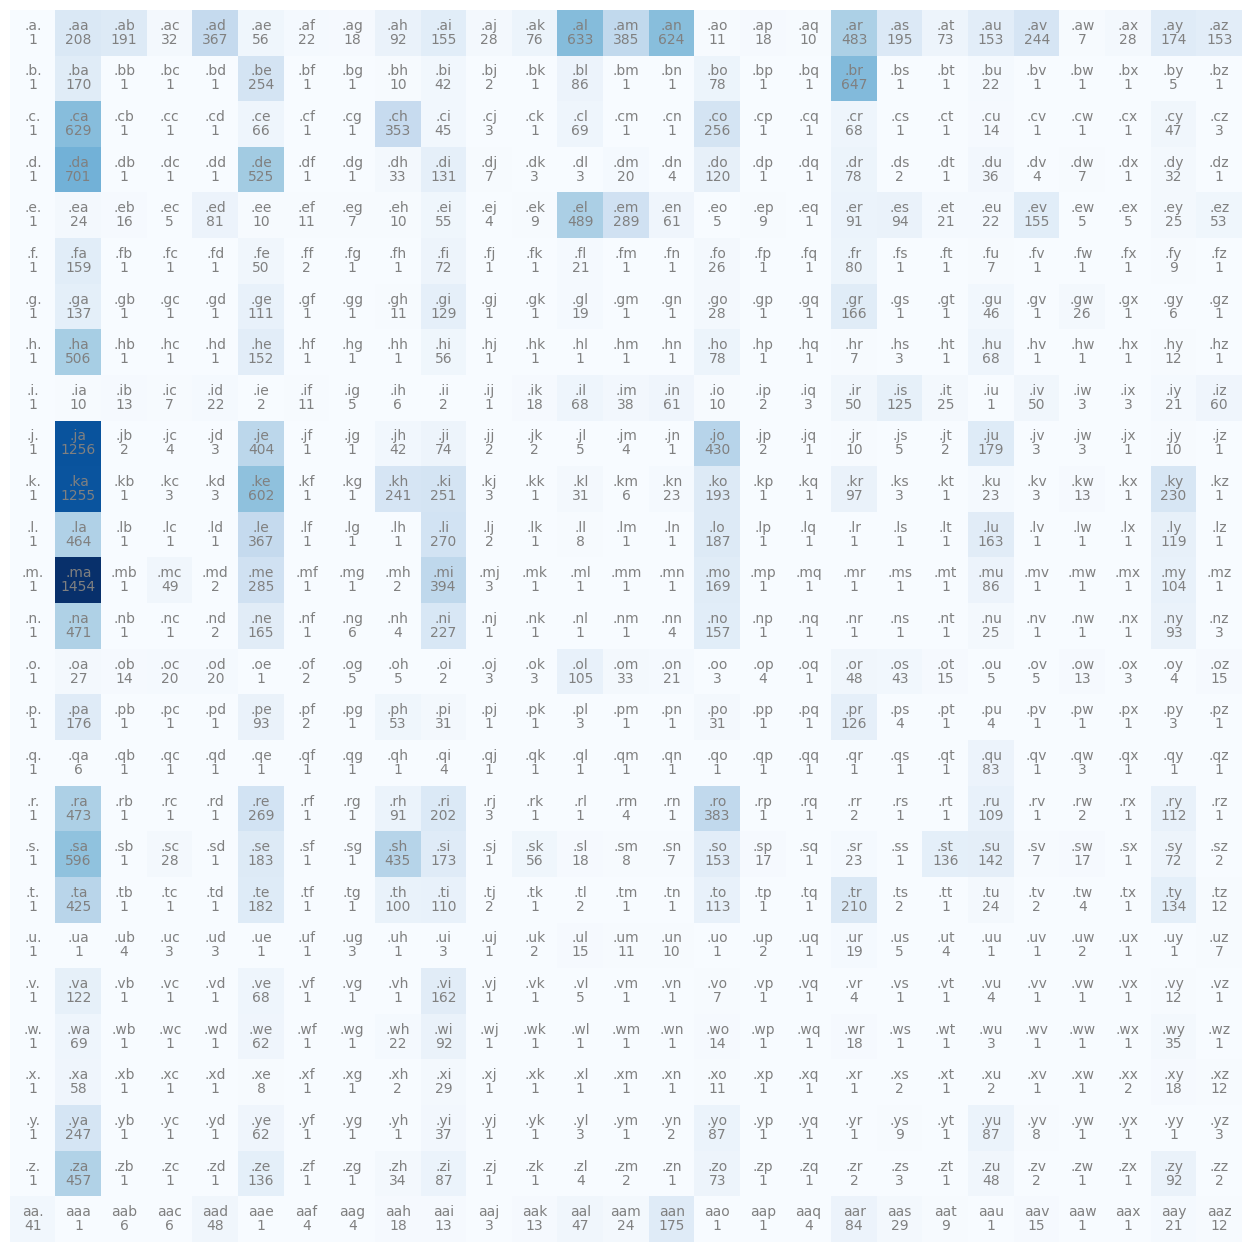

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(freqs[:27,:], cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itob[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, freqs[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

### Step 4: Create the probability matrix

In [38]:
P = freqs.float()
P.shape

torch.Size([702, 27])

In [39]:
P.sum(dim=1, keepdim=True).shape

torch.Size([702, 1])

In [40]:
# 702 * 27
# 702 * 1 -> sum of column valus

In [41]:
P = P / P.sum(dim=1, keepdim=True)
P.shape

torch.Size([702, 27])

In [43]:
P[65].sum()

tensor(1.)

Now for sampling, we will need to sample the first char from '.' , so we need to find the first character dist

In [55]:
first_char_freqs = torch.zeros(len(stoi), dtype=torch.int32)

for name in names:
    first_char_freqs[stoi[name[0]]] += 1

In [56]:
first_char_freqs

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [57]:
first_char_freqs.shape

torch.Size([27])

In [58]:
P_first = first_char_freqs / first_char_freqs.sum()
P_first.shape

torch.Size([27])

In [59]:
P_first.sum()

tensor(1.)

In [61]:
P_first

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

### Step 5: Do sampling from this

In [70]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5): #Lets sample 5 names
    curr_char, curr_name = ".", ""

    ## Sample first character
    sample_idx = torch.multinomial(P_first, num_samples=1, replacement=True, generator=g).item()
    sample_char = itos[sample_idx]

    curr_bigram = "." + sample_char
    curr_name += sample_char

    while True:
        curr_idx = btoi[curr_bigram]
         
        sample_idx = torch.multinomial(P[curr_idx], num_samples=1, replacement=True, generator=g).item()
        sample_char = itos[sample_idx]

        if sample_char == ".":
            break
        
        curr_bigram += sample_char
        curr_bigram = curr_bigram[1:]
        curr_name += sample_char

        # print(curr_bigram, curr_name)

    print(curr_name)

ce
bra
jalius
rochityharlonimittain
luwak


### Step 6: Calculate NLL for a name

In [71]:
def calculate_nll(og_name):
    nll, n = 0, 0

    name = ['.'] + list(og_name) + ['.']

    for ch1, ch2, ch3 in zip(name, name[1:], name[2:]):
        bigram = ch1 + ch2
        i1, i2 = btoi[bigram], stoi[ch3]
        nll += -torch.log(P[i1][i2]).item()
        n += 1

    nll = nll/n

    return nll

In [72]:
og_name = 'andrej'
nll = calculate_nll(og_name)
print(f"{og_name} has a NLL of: {nll}")

andrej has a NLL of: 2.4700524608294168


In [73]:
og_name = 'soham'
nll = calculate_nll(og_name)
print(f"{og_name} has a NLL of: {nll}")

soham has a NLL of: 2.500639033317566


In [74]:
og_name = 'andrejq'
nll = calculate_nll(og_name)
print(f"{og_name} has a NLL of: {nll}")

andrejq has a NLL of: 2.9169624022075107


In [75]:
og_name = 'emma'
nll = calculate_nll(og_name)
print(f"{og_name} has a NLL of: {nll}")

emma has a NLL of: 1.8591869920492172


In [76]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5): #Lets sample 5 names
    curr_char, curr_name = ".", ""

    ## Sample first character
    sample_idx = torch.multinomial(P_first, num_samples=1, replacement=True, generator=g).item()
    sample_char = itos[sample_idx]

    curr_bigram = "." + sample_char
    curr_name += sample_char

    while True:
        curr_idx = btoi[curr_bigram]
         
        sample_idx = torch.multinomial(P[curr_idx], num_samples=1, replacement=True, generator=g).item()
        sample_char = itos[sample_idx]

        if sample_char == ".":
            break
        
        curr_bigram += sample_char
        curr_bigram = curr_bigram[1:]
        curr_name += sample_char

        # print(curr_bigram, curr_name)

    nll = calculate_nll(curr_name)
    print(f"Generated name: {curr_name} has a NLL of: {nll}")

Generated name: ce has a NLL of: 2.034263700246811
Generated name: bra has a NLL of: 1.1685465176900227
Generated name: jalius has a NLL of: 1.9186706393957138
Generated name: rochityharlonimittain has a NLL of: 2.425066896847316
Generated name: luwak has a NLL of: 2.1630362808704375


### Step 7: Compute NLL of the full dataset

In [84]:
total_nll, n = 0, 0

for name in names:
    name = ['.'] + list(name) + ['.']
    for ch1, ch2, ch3 in zip(name, name[1:], name[2:]):
        bigram = ch1 + ch2
        i1, i2 = btoi[bigram], stoi[ch3]
        total_nll += -torch.log(P[i1][i2]).item()
        n += 1

avg_nll = total_nll/n

print(f"Average NLL of the train dataset for prob matrix: {avg_nll}")

Average NLL of the train dataset for prob matrix: 2.0930798565434383
